In [ ]:
import os
from google.cloud import bigquery
import matplotlib.pyplot as plt

# Conexión con BigQuery

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="E:/Desktop/Python Top Gun Lab/final_project/centering-valve-358203-eb0bab19cd78.json"


In [ ]:
# Construct a BigQuery client object.
client = bigquery.Client()

query = """
    SELECT * 
    FROM `bigquery-public-data.imdb.reviews` as reviews
    INNER JOIN `bigquery-public-data.imdb.title_basics` as titles
    ON reviews.movie_id = titles.tconst
"""
df = client.query(query).to_dataframe()  # Make an API request.


# Análisis de datos
El dataset que se esocogio fue el de IMDB, del cual seleccionamos dos tablas: reviews y title_basics las cuales se relacionan por medio de la columna movie_id y tconst.
Como resultado tenemos un dataset de 94674 filas y 16 columnas previo a su limpieza.
Respecto a cada columna tenemos:
1. Reviews: hace referencia a la review de cierta pelicula/Serie/show/etc realizada por un usuario
2. split: etiquta la fila para pertenecer a un subconjuto de datos: train y test, para posteriormente ser entrenada en un modelo de machine learning
3. label: Etiqueta que le asigna la polaridad de la review realizada(Positiva o negativa)
4. movie_id: caracter alfanumerico que identifica el producto audiovisual
5. reviewer_rating: El rating que le dio la persona que realizó la review 
6. movie_url: url para ver la información de la película en imdb 
7. title: titulo de la pelicula 
8. tconst: caracter alfanumerico que identifica el producto audiovisual
9. title_type: tipo de producto audiovisual: serie, pelicula, short, tvshow, etc
10. primary_title: El titulo mas popular.
11. original_title: El titulo original en el idioma original
12. is_adult: Si la pellicula es para adultos o no
13. start_year: Año de lanzamiento
14. end_year: año en que termino en caso de ser una serie o show
15. runtime_minutes: tiempo de duración
16. genres: Generos a losque pertenece la pelicula 
 

In [ ]:
#Los tipos de datos se encuentran a continuacion donde object hace referencia a string, int a entero
df.info()

In [ ]:
#diferentes tipos de formatos audiovisuales, solo nos interesan las peliculas
df['title_type'].value_counts()

In [ ]:
#Dimensión del dataset luego de solo elegir las peliculas
df_movies = df.loc[df['title_type'] == 'movie'].reset_index(drop=True)
df_movies.shape

In [ ]:
#Columnas a eliminar: tconst, movie_url, title_type, end_year
df_movies.head()

In [ ]:
df_movies.drop(['tconst', 'movie_url', 'title_type', 'end_year', 'title', 'original_title'], axis=1, inplace=True)
df_movies.head()

#de aqui sale el csv limpio!

# Visualizations

### ¿Influye la duración de las películas en la opinión que tienen las personas?

In [ ]:
# Eliminar filas en las que la columna 'review_rating es nula'
df_not_null_rating = df_movies.dropna(axis=0, subset=['reviewer_rating'])
# Agrupar por duración y promediar la calificación
df_unique_duration = df_not_null_rating.groupby(['runtime_minutes']).mean().round()
df_unique_duration.reset_index(inplace=True)
df_unique_duration

<AxesSubplot: title={'center': 'runtime_minutes'}, xlabel='reviewer_rating'>

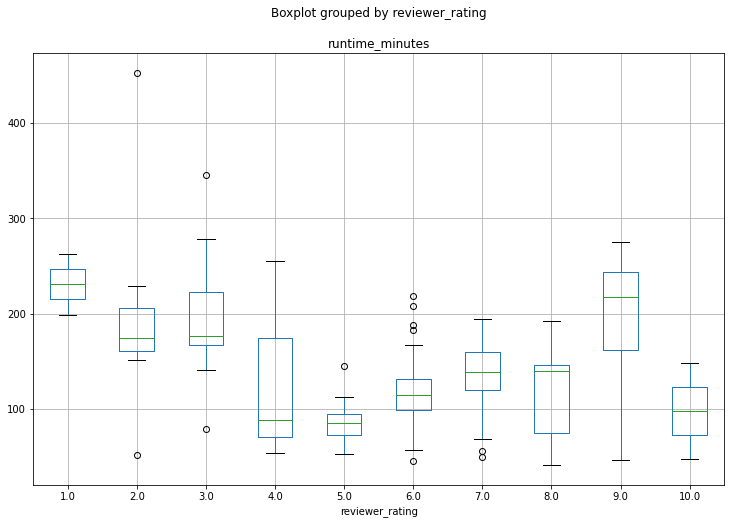

In [ ]:
# Visualizar la relación entre el rating y el tiempo de duración
df_unique_duration.boxplot(column='runtime_minutes', by='reviewer_rating',figsize=(12,8))

### ¿Qué géneros tienen mejores ratings?

In [ ]:
# Agrupar por géneros y promediar la calificación
df_unique_genre = df_not_null_rating.groupby(['genres']).mean().round()
df_unique_genre.reset_index(inplace=True)
df_unique_genre

,genres,reviewer_rating,is_adult,start_year,runtime_minutes
0,Action,4.0,0.0,1995.0,92.0
1,"Action,Adventure",4.0,0.0,1979.0,96.0
2,"Action,Adventure,Animation",6.0,0.0,1999.0,97.0
3,"Action,Adventure,Biography",6.0,0.0,2003.0,110.0
4,"Action,Adventure,Comedy",4.0,0.0,1997.0,102.0
...,...,...,...,...,...
450,"Thriller,War",6.0,0.0,1942.0,99.0
451,"Thriller,Western",1.0,0.0,2007.0,90.0
452,War,5.0,0.0,1985.0,112.0
453,"War,Western",3.0,0.0,1968.0,125.0


In [ ]:
# Inicializar una lista para guardar los géneros
simple_genres =[]
# Recorrer los conjuntos de géneros de las películas
for genre in df_unique_genre['genres']:
    # Separar los géneros de cada película
    for simple_genre in genre.split(','):
        # Agregar el género a la lista
        if simple_genre not in simple_genres:
            simple_genres.append(simple_genre)
# Organizar la lista de géneros
simple_genres.sort()

# Inicializar un diccionario para guardar los promedios de calificación por género
genres_rating = {}
# Recorrer la lista de géneros individuales
for genre in simple_genres:
    # Inicializar una lista para guardar las calificaciones de cada género
    ratings = []
    for i in range(len(df_unique_genre)):
        # Si el género está en el conjunto de géneros de la película
        if genre in df_unique_genre['genres'][i]:
            # Agregar la calificación de la película a la lista
            ratings.append(df_unique_genre['reviewer_rating'][i])
    # Calcular el promedio de las calificaciones de cada género
    genres_rating[genre] = (sum(ratings) / len(ratings)).round(2)

genres_rating


{'Action': 4.72,
 'Adult': 3.57,
 'Adventure': 5.09,
 'Animation': 5.43,
 'Biography': 5.42,
 'Comedy': 5.1,
 'Crime': 5.15,
 'Documentary': 5.81,
 'Drama': 5.38,
 'Family': 5.35,
 'Fantasy': 4.98,
 'Film-Noir': 4.21,
 'History': 5.73,
 'Horror': 3.97,
 'Music': 5.59,
 'Musical': 6.03,
 'Mystery': 4.96,
 'News': 2.0,
 'Romance': 5.05,
 'Sci-Fi': 4.6,
 'Short': 8.0,
 'Sport': 5.61,
 'Thriller': 4.55,
 'War': 5.66,
 'Western': 4.59}

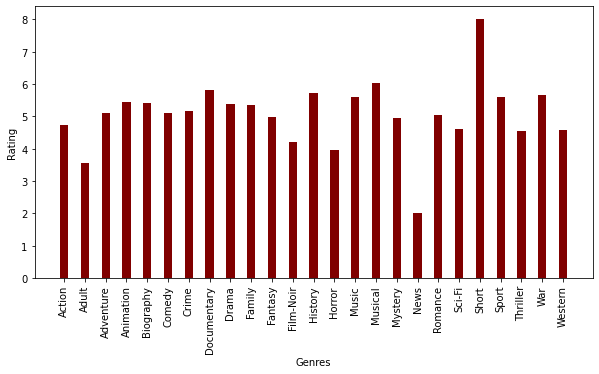

In [ ]:
# Visualizar la relación entre el rating y el género

genres = list(genres_rating.keys())
rating = list(genres_rating.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(genres, rating, color ='maroon',
        width = 0.4)

plt.xlabel("Genres")
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.show()

Se puede observar que el género de "Cortos" es el que tiene una mayor puntuación, mientras que el género de "Noticias" tiene una puntuación muy baja.

In [ ]:
df_movies['label'].value_counts()
    

In [ ]:
df_movies['split'].value_counts()

# Machine Learning model

In [ ]:
import pandas as pd
df_movies = pd.read_csv('clean_imdb.csv')

In [ ]:
#Para entrenar el modelo necesitamos unicamente las reviews con los datos etiquetados 
data_model = df_movies[['review','label']].loc[df_movies['label']!='Unsupervised']

In [ ]:
data_model.head()

In [ ]:
#observamos que el dataset se encuentra balanceado
data_model['label'].value_counts()

In [ ]:
from MLModelPreprocess import DataPreprocess

In [ ]:
preprocess = DataPreprocess(data_model)

clean_text = preprocess.convert_data()

In [ ]:
clean_text[1]

In [ ]:
vectorizer, text_features = preprocess.vectroize_data(clean_text)

In [ ]:
#division del dataset en entrenamiento y prueba: El dataset por defecto traia el mismo numero de train y test en la 
#columna split, por lo que ignoraremos esa notación y crearemos nuestro propio conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(text_features, data_model['label'], test_size=0.2, random_state=0)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

In [ ]:
predictions = nb.predict(X_train)

# Ahora calculamos el score de accuracy enviando las predicciónes y los valores reales de polaridad.
print(accuracy_score(y_train, predictions))


In [ ]:
predictions = nb.predict(X_test)

# Ahora calculamos el score de accuracy enviando las predicciónes y los valores reales de polaridad.
print(accuracy_score(y_test, predictions))